In [5]:
import cv2
import dlib
import matplotlib.pylab as plt

%matplotlib inline

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

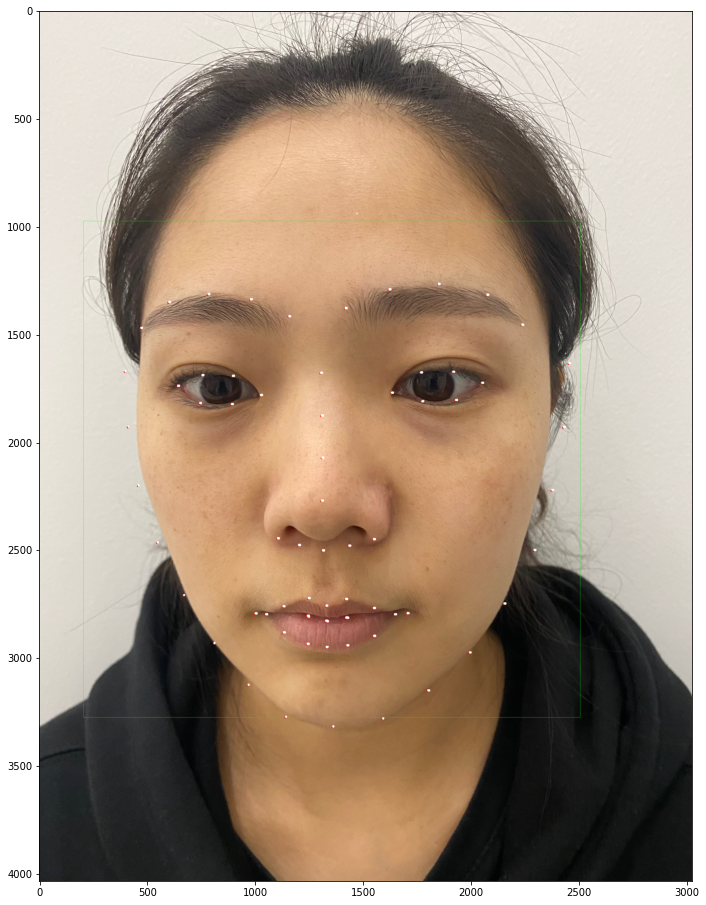

In [10]:
img_file ='/home/ncyc-admin/Project/Beauty/File/Face_Front/06_F.jpg'
img = cv2.imread(img_file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = detector(gray)

for rect in faces:
    x,y = rect.left(), rect.top()
    w,h = rect.right()-x, rect.bottom()-y
    cv2.rectangle(img,(x,y), (x+w,y+h), (0,255,0),1)
    
    shape = predictor(gray, rect)
    for i in range(68):
        part = shape.part(i)
        cv2.circle(img, (part.x, part.y), 5, (0,0,255), -1)
        cv2.putText(img, str(i), (part.x, part.y), cv2.FONT_HERSHEY_PLAIN, 0.5, (255,255,255), 5, cv2.LINE_AA)

plt.figure(figsize=(16,16))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)